In [63]:
from __future__ import absolute_import, division, print_function, unicode_literals

# импортируем TensorFlow и набор данных TensorFlow
import tensorflow as tf
import tensorflow_datasets as tfds

# вспомогательные библиотеки
import math
import numpy as np
import matplotlib.pyplot as plt

# Улучшим отображение прогрессбара
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

# убираем предупреждения для более четкого вывода
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [64]:
#Тренировочный датасет от MNIST

dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

#### Атрибуты одежды в наборе данных классифицируются следующим образом

- Метка	Класс
- 0	Футболка / топ
- 1	Шорты
- 2	Свитер
- 3	Платье
- 4	Плащ
- 5	Сандали
- 6	Рубашка
- 7	Кроссовок
- 8	Сумка
- 9	Ботинок


In [65]:
train_dataset # Картинки атрибутов одежды размером 28 на 28,на которых будет обучаться нейронная сеть

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [66]:
class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]

In [67]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Количество тренировочных экземпляров: {}'.format(num_train_examples))
print('Количество тестовых экземпляров: {}'.format(num_test_examples))

Количество тренировочных экземпляров: 60000
Количество тестовых экземпляров: 10000


In [68]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

# метод map применяет функцию нормализации к каждому элементу в массиве
# тестовых и тренировочных наборах данных
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

2024-10-09 14:02:13.137914: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


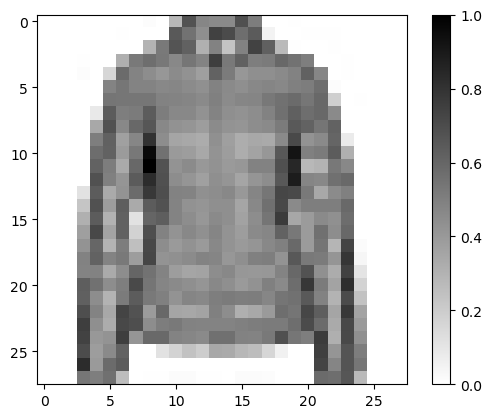

In [69]:
# Берём единственное изображение и удаляем из него цветовую составляющую
# посредством метода reshape()
for image, label in test_dataset.take(1):
    break;
image = image.numpy().reshape((28, 28))

# отрисовываем изображение
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

2024-10-09 14:02:17.266502: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-10-09 14:02:17.281304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


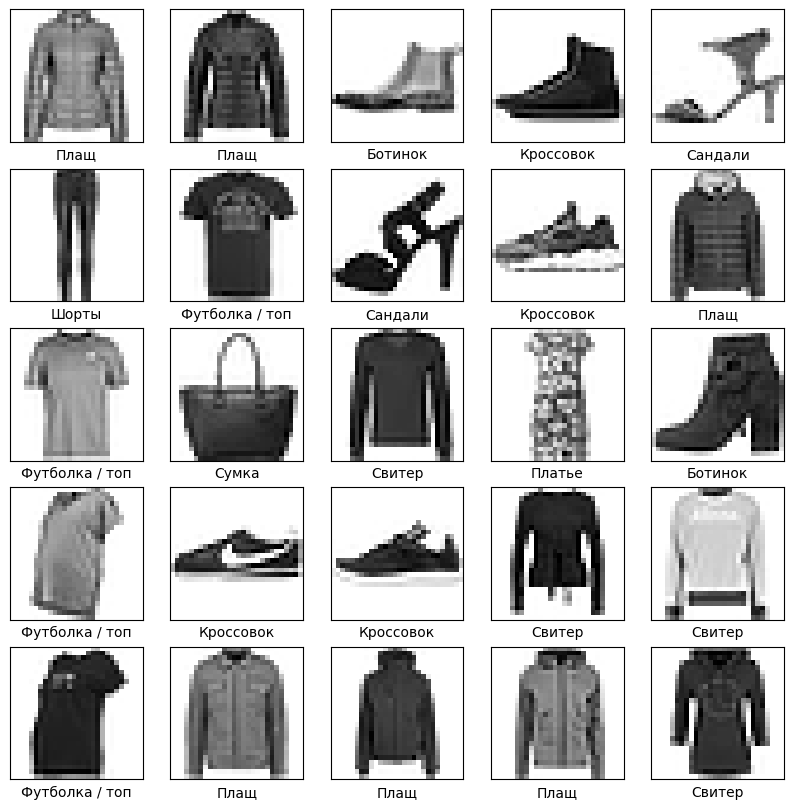

In [70]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [36]:
# Входной,скрытый и выходной слои(layers)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [37]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [38]:
#Повторяем бесконечное количество раз набор входных данных используя метод dataset.repeat() (параметр epochs, который описан ниже, определяет количество всех обучающих итераций для выполнения)
#Метод dataset.shuffle(60000) перемешивает все изображения для того, чтобы на обучение нашей модели не влиял порядок подачи входных данных.
#Метод dataset.batch(32) сообщает методу тренировки model.fit использовать блоки по 32 изображения и метки при обновлении внутренних переменных модели.

BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [39]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7806 - loss: 0.6289
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8629 - loss: 0.3820
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8722 - loss: 0.3495
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8833 - loss: 0.3198
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8908 - loss: 0.2943


In [40]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print("Точность на тестовом наборе данных: ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8753 - loss: 0.3463
Точность на тестовом наборе данных:  0.8715999722480774


In [41]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


2024-10-07 09:31:51.211893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [42]:
#предсказания модели — это массив из 10 значений. Эти значения описывают «уверенность» модели в том, что входное изображение относится к определённому классу (элементу одежды). Мы можем посмотреть максимальное значение следующим образом
np.argmax(predictions[0])

4

In [43]:
test_labels[0]

4

In [53]:


def plot_image(i, predictions_array, true_label, images):
    predictions_array, true_label, img = predictions_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img[...,0], cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100 * np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

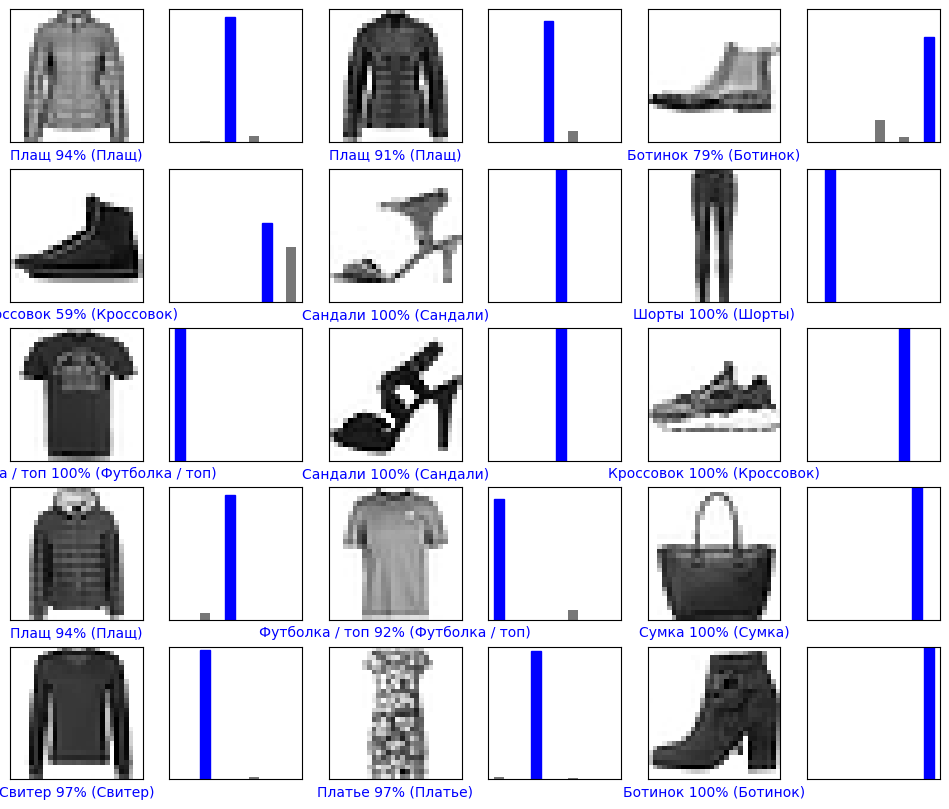

In [54]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    plot_value_array(i, predictions, test_labels)

### Готово. Модель задачи классификации функционирует и предсказывает с высокой точностью. Ее можно использовать,чтобы заменить специалиста,который создает карточки товара,ведь всю информацию модель может заполнить сама.

## Теперь рассмотрим как себя ведет сверточная нейронная сеть. Материал для ознакомления:

- СНС — свёрточные нейронные сети. Нейронная сеть, которая содержит хотя бы один свёрточный слой. Типичная СНС содержит и другие слои, такие как слои выборки и полносвязные слои.
- Свёртка — процесс применения фильтра («ядра») к изображению.
- Фильтр (ядро) — матрица, по размерам меньше, чем входные данные, предназначенная для преобразования входных данных блоками.
- Выравнивание — процесс добавления, чаще всего нулевых значений, по краям изображения.
- Операция подвыборки — процесс уменьшения размера изображения через сэмплирование. Существует несколько типов слоёв подвыборки, например, слой усредненной подвыборки (выборка среднего значения), однако подвыборка по максимальному значению используется чаще всего.
- Подвыборка по максимальному значению — процесс подвыборки, в ходе которого множество значений преобразовываются в единое значение — максимальное среди выборки.
- Шаг — количество пикселей смещения фильтром (ядром) на изображении.
- Сэмплирование (downsampling) — процесс уменьшения размера изображения.

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [72]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [73]:

BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [74]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 26ms/step - accuracy: 0.8039 - loss: 0.5436
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9017 - loss: 0.2677
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4376s 2s/step - accuracy: 0.9172 - loss: 0.2258
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9292 - loss: 0.1888
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9417 - loss: 0.1600


In [75]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print("Точность на тестовом наборе данных: ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9108 - loss: 0.2546
Точность на тестовом наборе данных:  0.9111999869346619


### Точность у сверточных моделей выше